In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df=pd.read_csv('titanic_toy.csv')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [50]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [51]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

# custom imputer

In [52]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Survived'])
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [53]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 3)
(179, 3)
(712,)
(179,)


In [54]:
mean_age=x_train['Age'].mean()
median_age=x_train['Age'].median()
mean_fare=x_train['Fare'].mean()
median_fare=x_train['Fare'].median()

In [55]:
print(mean_age)
print(mean_fare)
print(median_age)
print(median_fare)

29.787918871252206
32.83948982300885
28.0
14.4542


In [56]:
x_train['Age_mean']=x_train['Age'].fillna(mean_age)
x_train['Fare_mean']=x_train['Fare'].fillna(mean_fare)

x_train['Age_median']=x_train['Age'].fillna(median_age)
x_train['Fare_median']=x_train['Fare'].fillna(median_fare)

In [57]:
x_train

,Age,Fare,Family,Age_mean,Fare_mean,Age_median,Fare_median
290,26.0,78.8500,0,26.000000,78.8500,26.0,78.8500
67,19.0,8.1583,0,19.000000,8.1583,19.0,8.1583
517,NaN,24.1500,0,29.787919,24.1500,28.0,24.1500
250,NaN,7.2500,0,29.787919,7.2500,28.0,7.2500
768,NaN,24.1500,1,29.787919,24.1500,28.0,24.1500
...,...,...,...,...,...,...,...
480,9.0,46.9000,7,9.000000,46.9000,9.0,46.9000
730,29.0,211.3375,0,29.000000,211.3375,29.0,211.3375
820,52.0,93.5000,2,52.000000,93.5000,52.0,93.5000
202,34.0,6.4958,0,34.000000,6.4958,34.0,6.4958


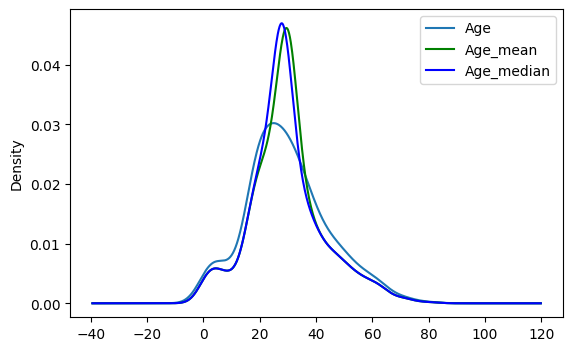

In [58]:
fig=plt.figure(figsize=(14,4))
ax=fig.add_subplot(121)

x_train['Age'].plot(kind='kde')
x_train['Age_mean'].plot(kind='kde',color='green')
x_train['Age_median'].plot(kind='kde',color='blue')
line,legend=ax.get_legend_handles_labels()
ax.legend(line,legend,loc='best')

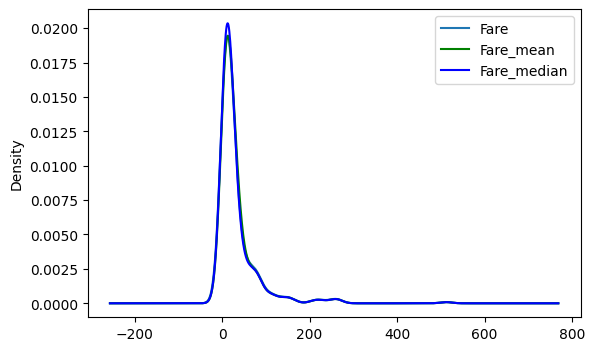

In [59]:
fig=plt.figure(figsize=(14,4))
ax=fig.add_subplot(121)
x_train['Fare'].plot(kind='kde')
x_train['Fare_mean'].plot(kind='kde',color='green')
x_train['Fare_median'].plot(kind='kde',color='blue')

line,legend=ax.get_legend_handles_labels()
ax.legend(line,legend,loc='best')

#  missing value imputation using scikit learn

In [60]:
x_train['Age'].isnull().sum()

145

In [61]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')


In [62]:
x_train

,Age,Fare,Family,Age_mean,Fare_mean,Age_median,Fare_median
290,26.0,78.8500,0,26.000000,78.8500,26.0,78.8500
67,19.0,8.1583,0,19.000000,8.1583,19.0,8.1583
517,NaN,24.1500,0,29.787919,24.1500,28.0,24.1500
250,NaN,7.2500,0,29.787919,7.2500,28.0,7.2500
768,NaN,24.1500,1,29.787919,24.1500,28.0,24.1500
...,...,...,...,...,...,...,...
480,9.0,46.9000,7,9.000000,46.9000,9.0,46.9000
730,29.0,211.3375,0,29.000000,211.3375,29.0,211.3375
820,52.0,93.5000,2,52.000000,93.5000,52.0,93.5000
202,34.0,6.4958,0,34.000000,6.4958,34.0,6.4958


In [63]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [64]:
x_train

,Age,Fare,Family,Age_mean,Fare_mean,Age_median,Fare_median
290,26.0,78.8500,0,26.000000,78.8500,26.0,78.8500
67,19.0,8.1583,0,19.000000,8.1583,19.0,8.1583
517,NaN,24.1500,0,29.787919,24.1500,28.0,24.1500
250,NaN,7.2500,0,29.787919,7.2500,28.0,7.2500
768,NaN,24.1500,1,29.787919,24.1500,28.0,24.1500
...,...,...,...,...,...,...,...
480,9.0,46.9000,7,9.000000,46.9000,9.0,46.9000
730,29.0,211.3375,0,29.000000,211.3375,29.0,211.3375
820,52.0,93.5000,2,52.000000,93.5000,52.0,93.5000
202,34.0,6.4958,0,34.000000,6.4958,34.0,6.4958


In [65]:
x_train=trf.transform(x_train)
# x_test=trf.transform(x_test)

In [66]:
x_train

array([[26.    , 78.85  ,  0.    , ..., 78.85  , 26.    , 78.85  ],
       [19.    ,  8.1583,  0.    , ...,  8.1583, 19.    ,  8.1583],
       [28.    , 24.15  ,  0.    , ..., 24.15  , 28.    , 24.15  ],
       ...,
       [52.    , 93.5   ,  2.    , ..., 93.5   , 52.    , 93.5   ],
       [34.    ,  6.4958,  0.    , ...,  6.4958, 34.    ,  6.4958],
       [14.5   , 14.4542,  1.    , ..., 14.4542, 14.5   , 14.4542]])